In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='ttt', src=FILE, fpath='./hce_data/ttt/ttt.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.016797304153442383] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "tls": "categorical",
    "tms": "categorical",
    "trs": "categorical",
    "mls": "categorical",
    "mms": "categorical",
    "mrs": "categorical",
    "bls": "categorical",
    "bms": "categorical",
    "brs": "categorical",
    "class": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'tls': ['equal'], 'tms': ['equal'], 'trs': ['equal'], 'mls': ['equal'], 'mms': ['equal'], 'mrs': ['equal'], 'bls': ['equal'], 'bms': ['equal'], 'brs': ['equal'], 'class': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, gre

In [4]:
# pf.session.change_dtypes(['tls', 'ZipCode', 'PhoneNumber', 'State', 'EmergencyService','Score', 'Sample'], 
#                             [CATEGORICAL, NUMERIC, CATEGORICAL, TEXT, TEXT, NUMERIC, NUMERIC],
#                             [None, None, None, None, None, r'(\d+)%', r'(\d+)\spatients'])

In [5]:
pf.session.load_training_data(multiplier = 100, difference=False)

INFO:profiler.utility:[0.09514474868774414] Create Training Data start

INFO:profiler.utility:[0.13722729682922363] Create Training Data execution time: 0.04208254814147949



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.14325475692749023] Learn Structure start

INFO:profiler.learner:use threshold 0.4903
INFO:profiler.utility:[0.27312278747558594] Learn Structure execution time: 0.1298680305480957



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.28035473823547363] Get Dependencies start

INFO:profiler.utility:[0.32774972915649414] Get Dependencies execution time: 0.04739499092102051



mms -> trs (0.17101598205987767)
mms,trs -> mrs (0.23956475616444084)
mms,trs,mrs -> brs (0.15765835294799388)
mms,trs,mrs,brs -> tls (0.15102866332317635)
mms,trs,mrs,brs -> bls (0.15062457969927773)
mms,trs,mrs,brs,tls,bls -> bms (0.17136526635139204)
trs,mrs,tls,bls,bms -> class (0.2388765164298024)
mms,mrs,brs,bms -> tms (0.16732179689631765)
mms,mrs,brs,bms -> mls (0.1714134280313984)
{'mms': array([], dtype=object), 'trs': array(['mms'], dtype=object), 'mrs': array(['mms', 'trs'], dtype=object), 'brs': array(['mms', 'trs', 'mrs'], dtype=object), 'tls': array(['mms', 'trs', 'mrs', 'brs'], dtype=object), 'bls': array(['mms', 'trs', 'mrs', 'brs'], dtype=object), 'bms': array(['mms', 'trs', 'mrs', 'brs', 'tls', 'bls'], dtype=object), 'class': array(['trs', 'mrs', 'tls', 'bls', 'bms'], dtype=object), 'tms': array(['mms', 'mrs', 'brs', 'bms'], dtype=object), 'mls': array(['mms', 'mrs', 'brs', 'bms'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


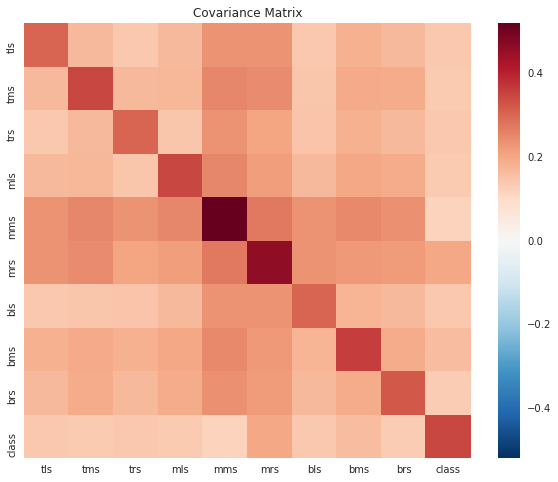

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


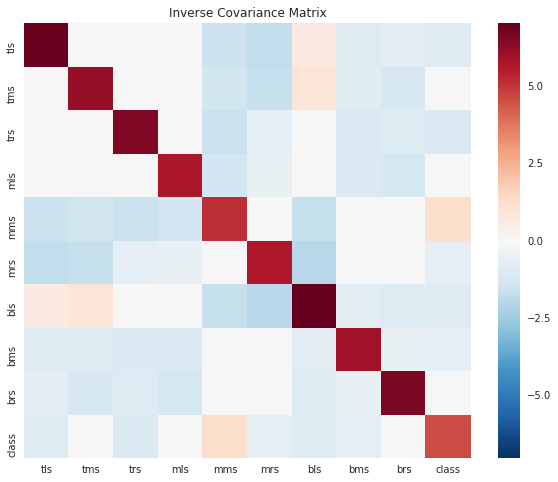

none-zero pairs of abs inv


In [9]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


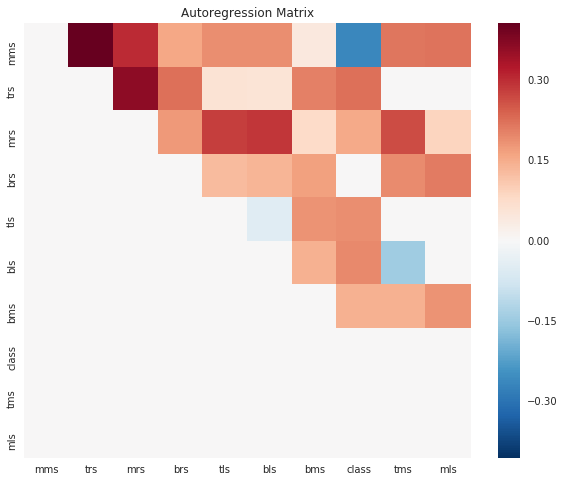

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.016797,start: Load Data,0.000000
1,0.077788,end: Load Data,0.060990
2,0.095145,start: Create Training Data,0.000000
3,0.137227,end: Create Training Data,0.042083
4,0.143255,start: Learn Structure,0.000000
5,0.273123,end: Learn Structure,0.129868
6,0.280355,start: Get Dependencies,0.000000
7,0.327750,end: Get Dependencies,0.047395
8,0.327750,total_execution_time,0.280336


In [12]:
pf.session.timer.to_csv()